In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler

In [ ]:
#loading the datset
train=pd.read_csv('train_genetic_disorders.csv')
test=pd.read_csv('test_genetic_disorders.csv')
data_train=train.copy()
data_test=test.copy()

In [ ]:
train

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
#No. of missing values in each row
data_train.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
data_test.isnull().sum()

Patient Id                                           173
Patient Age                                          173
Genes in mother's side                               173
Inherited from father                                717
Maternal gene                                       3829
Paternal gene                                        173
Blood cell count (mcL)                               173
Patient First Name                                   173
Family Name                                         9316
Father's name                                        173
Mother's age                                         173
Father's age                                         173
Institute Name                                      2170
Location of Institute                                173
Status                                               173
Respiratory Rate (breaths/min)                      3013
Heart Rate (rates/min                               3014
Test 1                         

In [ ]:
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]

In [ ]:
#subset where no all rows being null
data_fea_test=data_test[data_test.isnull().all(1)!=True]

In [ ]:
data_test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 45) (9290, 43)


In [ ]:
data_fea_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                544
Maternal gene                                       3656
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9143
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      1997
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2840
Heart Rate (rates/min                               2841
Test 1                         

In [ ]:
# Dropping the features
data_fea_train=data_fea_train.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])
data_fea_test=data_fea_test.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])

In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 33) (9290, 31)


In [ ]:
# renaming the columns
data_fea_train=data_fea_train.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_test=data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_train['genetic_disorder']

0         Mitochondrial genetic inheritance disorders
1                                                 NaN
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
                             ...                     
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21008    Multifactorial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 21011, dtype: object

In [ ]:
# missing target variables
data_fea_train.iloc[:,-2].isnull().sum(),data_fea_train.iloc[:,-1].isnull().sum()

(2049, 2068)

In [ ]:
# removing rows of missing target variables
data_fea_train=data_fea_train[(data_fea_train['genetic_disorder'].isnull()!=True)&(data_fea_train['disorder_subclass'].isnull()!=True)]

In [ ]:
data_fea_train.shape

(17160, 33)

In [ ]:
data_fea_train

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [ ]:
#Subsetting
X=data_fea_train.iloc[:,:-2]
y1=data_fea_train.iloc[:,-2]
y2=data_fea_train.iloc[:,-1]

In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
y1

0         Mitochondrial genetic inheritance disorders
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
5                    Single-gene inheritance diseases
                             ...                     
21005     Mitochondrial genetic inheritance disorders
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 17160, dtype: object

In [ ]:
y2

0        Leber's hereditary optic neuropathy
2                                   Diabetes
3                             Leigh syndrome
4                                     Cancer
5                            Cystic fibrosis
                        ...                 
21005                 Mitochondrial myopathy
21006                              Tay-Sachs
21007                         Leigh syndrome
21009                 Mitochondrial myopathy
21010                         Leigh syndrome
Name: disorder_subclass, Length: 17160, dtype: object

In [ ]:
# shape of features,target variables
X.shape,y1.shape,y2.shape

((17160, 31), (17160,), (17160,))

In [ ]:
# test data
X_test=data_fea_test

In [ ]:
#converting dissimilar datatype to one
for i in X_test.columns:
    if X_test[i].dtype!=X[i].dtype:
        X_test[i]=X_test[i].astype(X[i].dtype.name)

In [ ]:
X_test.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,-99,2.0,Multiple,-99.000000,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,NaN,Yes,5.118890,33.0,53.0,Alive,NaN,...,Yes,-99.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,NaN,No,No,4.876204,48.0,60.0,Deceased,NaN,...,No,0.0,Singular,-99.000000,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,-99,...,Yes,-99.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,NaN,NaN,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,-99.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,-99,...,-99,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,NaN,Yes,4.754449,45.0,27.0,Deceased,NaN,...,-99,1.0,Singular,-99.000000,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,-99,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,NaN,...,-99,0.0,-99,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Data Cleaning
X_test=X_test.replace('-99',np.nan)
# Cleaning_data
# replace '-' with other values
X['radiation_exposure']=X['radiation_exposure'].replace('-','others')
X['substance_abuse']=X['substance_abuse'].replace('-','others')
# Cleaning_data
X_test['radiation_exposure']=X_test['radiation_exposure'].replace('-','others')
X_test['substance_abuse']=X_test['substance_abuse'].replace('-','others')


In [ ]:
# Data Cleaning
X_test['WBC_count']=X_test['WBC_count'].mask(X_test['WBC_count']<0,np.nan)
X_test['num_previous_abortion']=X_test['num_previous_abortion'].mask(X_test['num_previous_abortion']<0,np.nan)

In [ ]:
#Splitting the data
X_train1,X_val1,y_train1,y_val1= train_test_split(X,y1,stratify=y1,test_size=0.20)
X_train2,X_val2,y_train2,y_val2= train_test_split(X,y2,stratify=y2,test_size=0.20)

In [ ]:
y_val1

851      Mitochondrial genetic inheritance disorders
1459     Mitochondrial genetic inheritance disorders
10065    Mitochondrial genetic inheritance disorders
11887               Single-gene inheritance diseases
3557                Single-gene inheritance diseases
                            ...                     
14191    Mitochondrial genetic inheritance disorders
5773     Mitochondrial genetic inheritance disorders
1785                Single-gene inheritance diseases
8941     Mitochondrial genetic inheritance disorders
2104                Single-gene inheritance diseases
Name: genetic_disorder, Length: 3432, dtype: object

In [ ]:
# shape of train,validation set
print(X_train1.shape,X_val1.shape,y_train1.shape,y_val1.shape)
print(X_train2.shape,X_val2.shape,y_train2.shape,y_val2.shape)

(13728, 31) (3432, 31) (13728,) (3432,)
(13728, 31) (3432, 31) (13728,) (3432,)


In [ ]:
X_train2

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
7697,1.0,Yes,Yes,Yes,Yes,4.881783,30.0,33.0,Alive,Tachypnea,...,Yes,4.0,Multiple,6.825846,slightly abnormal,0.0,1.0,1.0,NaN,1.0
817,3.0,Yes,No,Yes,No,4.716598,31.0,NaN,Deceased,NaN,...,No,0.0,NaN,11.804775,normal,0.0,1.0,1.0,1.0,0.0
8823,13.0,No,No,No,No,4.934892,25.0,57.0,Alive,Normal (30-60),...,No,2.0,Singular,10.637736,inconclusive,1.0,0.0,0.0,1.0,0.0
11583,8.0,Yes,No,No,No,4.973124,28.0,48.0,Alive,Tachypnea,...,No,3.0,Multiple,4.269271,normal,1.0,0.0,0.0,1.0,0.0
4691,11.0,No,No,Yes,Yes,4.808120,38.0,NaN,Alive,Normal (30-60),...,Yes,1.0,Multiple,7.475077,normal,1.0,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15933,2.0,Yes,Yes,Yes,No,4.785609,NaN,58.0,Deceased,Normal (30-60),...,Yes,0.0,Singular,11.840125,NaN,0.0,1.0,1.0,0.0,0.0
12340,13.0,Yes,Yes,Yes,Yes,5.000257,NaN,NaN,Alive,Normal (30-60),...,Yes,2.0,Singular,NaN,inconclusive,1.0,0.0,1.0,0.0,0.0
19238,5.0,No,Yes,Yes,Yes,4.876520,27.0,36.0,Alive,Normal (30-60),...,Yes,4.0,Multiple,7.006039,slightly abnormal,1.0,1.0,1.0,1.0,0.0
8608,14.0,Yes,No,No,No,4.966759,51.0,29.0,Deceased,Normal (30-60),...,No,2.0,Multiple,11.922461,inconclusive,1.0,0.0,0.0,0.0,1.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
#Ignore the warnings
pd.options.mode.chained_assignment = None

In [ ]:
# missing value imputation
for i in X.columns:
    if (X[i].dtype.name!='object')&(X[i].nunique()<=3):
        imp_mode_num.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode_num.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode_num.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode_num.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode_num.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode_num.transform(np.array(X_test[i]).reshape(-1,1))
    elif (X[i].dtype.name!='object')&(X[i].nunique()>3):
        imp_median.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_median.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_median.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_median.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_median.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_median.transform(np.array(X_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode.transform(np.array(X_test[i]).reshape(-1,1))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = 

In [ ]:
# checking null values
X_train1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_train2.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_val1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9289
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   9290 non-null   float64
 1   defective_mother              9290 non-null   object 
 2   defective_father              9290 non-null   object 
 3   maternal_gene                 9290 non-null   object 
 4   paternal_gene                 9290 non-null   object 
 5   blood_cell_count              9290 non-null   float64
 6   mother_age                    9290 non-null   float64
 7   father_age                    9290 non-null   float64
 8   Status                        9290 non-null   object 
 9   respiratory_rate              9290 non-null   object 
 10  heart_rate                    9290 non-null   object 
 11  follow_up                     9290 non-null   object 
 12  Gender                        9290 non-null   object 
 13  bir

In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,Yes,2.0,Multiple,7.474457,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,Yes,Yes,5.118890,33.0,53.0,Alive,Normal (30-60),...,Yes,2.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,No,No,No,4.876204,48.0,60.0,Deceased,Normal (30-60),...,No,0.0,Singular,7.474457,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,Normal (30-60),...,Yes,2.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,No,Yes,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,2.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,Normal (30-60),...,Yes,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,Yes,Yes,4.754449,45.0,27.0,Deceased,Normal (30-60),...,Yes,1.0,Singular,7.474457,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,slightly abnormal,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,Normal (30-60),...,Yes,0.0,Singular,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test1 = X_test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:

# reset index
X_train1.reset_index(inplace=True)
X_val1.reset_index(inplace=True)

In [ ]:
# # reset index
# X_train2.reset_index(inplace=True)
# X_val2.reset_index(inplace=True)

In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
            X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
            X_test.loc[:,i]=ord_enc.transform(np.array(X_test[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_encode_tr1=pd.DataFrame(ohe_enc.transform(np.array(X_train1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va1=pd.DataFrame(ohe_enc.transform(np.array(X_val1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode1=pd.DataFrame(ohe_enc.transform(np.array(X_test[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train1=pd.concat([X_train1,X_encode_tr1],axis=1)
            X_val1=pd.concat([X_val1,X_encode_va1],axis=1)
            X_test=pd.concat([X_test,X_encode1],axis=1)
            X_train1.drop(columns=[i],inplace=True)
            X_val1.drop(columns=[i],inplace=True)
            X_test.drop(columns=[i],inplace=True)

In [ ]:
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:
X_train2.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_train2.loc[:,i]=ord_enc.transform(np.array(X_train2[i]).reshape(-1,1))
            X_val2.loc[:,i]=ord_enc.transform(np.array(X_val2[i]).reshape(-1,1))
            # X_test1.loc[:,i]=ord_enc.transform(np.array(X_test1[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_encode_tr2=pd.DataFrame(ohe_enc.transform(np.array(X_train2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va2=pd.DataFrame(ohe_enc.transform(np.array(X_val2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            # X_encode2=pd.DataFrame(ohe_enc.transform(np.array(X_test1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train2=pd.concat([X_train2,X_encode_tr2],axis=1)
            X_val2=pd.concat([X_val2,X_encode_va2],axis=1)
            # X_test1=pd.concat([X_test1,X_encode2],axis=1)
            X_train2.drop(columns=[i],inplace=True)
            X_val2.drop(columns=[i],inplace=True)
            # X_test1.drop(columns=[i],inplace=True)

In [ ]:
# shape of the train,test,val
X_train1.shape,X_val1.shape,X_test.shape

((13728, 49), (3432, 49), (9290, 48))

In [ ]:
X_train2.shape,X_val2.shape

((21005, 53), (15083, 53))

In [ ]:
X_val1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,851,12.0,1.0,0.0,0.0,0.0,4.928664,35.0,25.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1459,6.0,1.0,0.0,1.0,0.0,4.897278,35.0,48.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10065,13.0,1.0,1.0,1.0,0.0,4.694750,37.0,32.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,11887,10.0,1.0,0.0,1.0,0.0,4.966551,35.0,42.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3557,11.0,1.0,1.0,0.0,0.0,5.078562,51.0,22.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,14191,7.0,1.0,0.0,1.0,1.0,4.781877,42.0,62.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3428,5773,0.0,1.0,1.0,1.0,1.0,4.989539,18.0,62.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3429,1785,1.0,0.0,0.0,0.0,1.0,4.992996,42.0,36.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3430,8941,13.0,0.0,1.0,1.0,1.0,4.956816,48.0,58.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X_test['maternal_gene']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9285    0.0
9286    1.0
9287    0.0
9288    1.0
9289    0.0
Name: maternal_gene, Length: 9290, dtype: float64

In [ ]:
# X_train1.drop(columns='index',inplace=True)
# X_test.drop(columns='index',inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X2=min_max.fit_transform(X_train1)
# X22=min_max.fit_transform(X_train2)

In [ ]:
# normalised minmax
X2=pd.DataFrame(X2,columns=X_train1.columns)
# X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:

X2

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.043122,0.000000,1.0,0.0,1.0,0.0,0.596231,0.878788,0.454545,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.752308,0.357143,1.0,1.0,0.0,1.0,0.518463,0.606061,0.727273,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.960543,0.357143,1.0,0.0,1.0,1.0,0.292235,0.939394,0.545455,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.736554,0.714286,0.0,1.0,0.0,1.0,0.744849,0.515152,0.886364,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.013232,0.500000,0.0,1.0,1.0,0.0,0.548458,0.575758,0.954545,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.767111,0.857143,0.0,0.0,0.0,1.0,0.526438,0.969697,0.250000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13724,0.380200,0.285714,1.0,1.0,1.0,0.0,0.451615,0.515152,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13725,0.581818,0.071429,1.0,1.0,0.0,0.0,0.613670,0.515152,0.227273,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13726,0.792718,0.357143,0.0,1.0,1.0,1.0,0.346851,0.606061,0.568182,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#normalised val1
X2_val=min_max.transform(X_val1)
X2_val=pd.DataFrame(X2_val,columns=X_val1.columns)

In [ ]:
#normalised test
X2_test=min_max.transform(X2)
X2_test=pd.DataFrame(X2_test,columns=X2.columns)

In [ ]:
# enoding the target variables1
lab_enc1=LabelEncoder()
y1_en=lab_enc1.fit_transform(y_train1)
y1_en_val=lab_enc1.transform(y_val1)

In [ ]:
print(y1_en_val.shape)

(3432,)


In [ ]:
min_max=MinMaxScaler()
X22=min_max.fit_transform(X_train2)

In [ ]:
X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:
#normalised val2
X22_val=min_max.transform(X_val2)
X22_val=pd.DataFrame(X22_val,columns=X_val2.columns)

In [ ]:
#normalised test2
X22_test=min_max.transform(X22)
X22_test=pd.DataFrame(X22_test,columns=X22.columns)

In [ ]:
# enoding the target variables2
lab_enc2=LabelEncoder()
y2_en=lab_enc2.fit_transform(y_train2)
y2_en_val=lab_enc2.transform(y_val2)

In [ ]:
print(y2_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y1_en),np.unique(y1_en_val)

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(y2_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(X2.shape,y1_en.shape)

(13728, 49) (13728,)


In [ ]:
# print(X22.shape,y2_en.shape)

In [ ]:
X2_val

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.040505,0.857143,1.0,0.0,0.0,0.0,0.521656,0.515152,0.113636,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.069443,0.428571,1.0,0.0,1.0,0.0,0.499616,0.515152,0.636364,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.479058,0.928571,1.0,1.0,1.0,0.0,0.357392,0.575758,0.272727,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.565778,0.714286,1.0,0.0,1.0,0.0,0.548262,0.515152,0.500000,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.169300,0.785714,1.0,1.0,0.0,0.0,0.626921,1.000000,0.045455,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.675440,0.500000,1.0,0.0,1.0,1.0,0.418576,0.727273,0.954545,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3428,0.274774,0.000000,1.0,1.0,1.0,1.0,0.564406,0.000000,0.954545,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3429,0.084960,0.071429,0.0,0.0,0.0,1.0,0.566833,0.727273,0.363636,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3430,0.425559,0.928571,0.0,1.0,1.0,1.0,0.541426,0.909091,0.863636,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,2.052467e-06,0.000000,1.0,0.0,1.0,0.0,-2.520765,-0.518825,-0.444215,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.580716e-05,0.025510,1.0,1.0,0.0,1.0,-2.575378,-0.527089,-0.438017,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4.571835e-05,0.025510,1.0,0.0,1.0,1.0,-2.734245,-0.516988,-0.442149,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3.505731e-05,0.051020,0.0,1.0,0.0,1.0,-2.416399,-0.529844,-0.434401,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.297855e-07,0.035714,0.0,1.0,1.0,0.0,-2.554314,-0.528007,-0.432851,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,3.651170e-05,0.061224,0.0,0.0,0.0,1.0,-2.569777,-0.516070,-0.448864,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13724,1.809614e-05,0.020408,1.0,1.0,1.0,0.0,-2.622321,-0.529844,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13725,2.769244e-05,0.005102,1.0,1.0,0.0,0.0,-2.508519,-0.529844,-0.449380,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13726,3.773050e-05,0.025510,0.0,1.0,1.0,1.0,-2.695891,-0.527089,-0.441632,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X2, pd.DataFrame(y1_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm.shape}''')
print('balanced class (%):')
y_sm.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 49) 
shape of X after SMOTE: (21039, 49)
balanced class (%):


0    33.333333
1    33.333333
2    33.333333
dtype: float64

In [ ]:
# X22 = X22.dropna()

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm1, y_sm1 = sm.fit_resample(X2, pd.DataFrame(y2_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm1.shape}''')
print('balanced class (%):')
y_sm1.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 49) 
shape of X after SMOTE: (31923, 49)
balanced class (%):


0    11.111111
1    11.111111
2    11.111111
3    11.111111
4    11.111111
5    11.111111
6    11.111111
7    11.111111
8    11.111111
dtype: float64

In [ ]:
X_sm

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.043122,0.000000,1.000000,0.0,1.000000,0.000000,0.596231,0.878788,0.454545,1.0,...,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
1,0.752308,0.357143,1.000000,1.0,0.000000,1.000000,0.518463,0.606061,0.727273,1.0,...,1.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
2,0.960543,0.357143,1.000000,0.0,1.000000,1.000000,0.292235,0.939394,0.545455,1.0,...,0.0,0.0,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,0.000000
3,0.736554,0.714286,0.000000,1.0,0.000000,1.000000,0.744849,0.515152,0.886364,1.0,...,1.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000
4,0.013232,0.500000,0.000000,1.0,1.000000,0.000000,0.548458,0.575758,0.954545,1.0,...,0.0,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21034,0.441513,0.603179,0.444505,0.0,0.000000,0.555495,0.541302,0.286197,0.739873,1.0,...,0.0,1.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
21035,0.460389,0.237765,0.189815,0.0,1.000000,0.810185,0.378210,0.810185,0.493371,1.0,...,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,1.000000,0.000000
21036,0.212457,0.815558,0.417817,0.0,1.000000,1.000000,0.399513,0.838523,0.299504,0.0,...,1.0,0.0,0.582183,0.0,0.417817,0.0,0.000000,0.000000,0.000000,1.000000
21037,0.441652,0.071429,1.000000,0.0,1.000000,0.795559,0.438819,0.859530,0.825456,0.0,...,1.0,0.0,0.000000,0.0,0.000000,1.0,0.795559,0.204441,0.000000,0.000000


In [ ]:
y_sm

,0
0,1
1,2
2,2
3,0
4,0
...,...
21034,2
21035,2
21036,2
21037,2


In [ ]:
X_sm1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.043122,0.000000,1.000000,0.0,1.000000,0.000000,0.596231,0.878788,0.454545,1.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000
1,0.752308,0.357143,1.000000,1.0,0.000000,1.000000,0.518463,0.606061,0.727273,1.000000,...,1.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.0,1.000000
2,0.960543,0.357143,1.000000,0.0,1.000000,1.000000,0.292235,0.939394,0.545455,1.000000,...,0.000000,0.0,0.0,0.000000,1.0,0.000000,1.000000,0.000000,0.0,0.000000
3,0.736554,0.714286,0.000000,1.0,0.000000,1.000000,0.744849,0.515152,0.886364,1.000000,...,1.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,1.000000,0.0,0.000000
4,0.013232,0.500000,0.000000,1.0,1.000000,0.000000,0.548458,0.575758,0.954545,1.000000,...,0.000000,1.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31918,0.311845,0.714286,0.000000,0.0,0.553711,0.000000,0.632267,0.666164,0.489857,0.553711,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000
31919,0.392088,0.568482,1.000000,0.0,0.458295,0.000000,0.541268,0.417937,0.550204,0.000000,...,1.000000,0.0,0.0,0.458295,0.0,0.541705,0.458295,0.000000,0.0,0.541705
31920,0.798947,0.741494,1.000000,0.0,0.000000,0.000000,0.490423,0.340550,0.500000,0.000000,...,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
31921,0.358078,0.285714,0.000000,1.0,1.000000,0.166350,0.360559,0.515152,0.416825,1.000000,...,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000


In [ ]:
y_sm1

,0
0,5
1,7
2,8
3,7
4,3
...,...
31918,8
31919,8
31920,8
31921,8


In [ ]:
y1_enco=np.array(y_sm).ravel()

In [ ]:
y2_enco=np.array(y_sm1).ravel()

In [ ]:
y1_enco

array([1, 2, 2, ..., 2, 2, 2])

In [ ]:
y2_enco

array([5, 7, 8, ..., 8, 8, 8])

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sel1=SelectKBest(chi2, k=25).fit(X_sm,y1_enco)

In [ ]:
sel2=SelectKBest(chi2, k=25).fit(X_sm1,y2_enco)

In [ ]:
cols=sel1.get_support(indices=True)
print(X_sm.iloc[:,cols].shape)
result_kbest_20=X_sm.iloc[:,cols] #train shape
# result_kbest_y20=X_sm.iloc[:,-1]

(21039, 25)


In [ ]:
cols2=sel2.get_support(indices=True)
print(X_sm1.iloc[:,cols2].shape)
result_kbest_202=X_sm1.iloc[:,cols] #train shape

(31923, 25)


In [ ]:
# print(result_kbest_y20.shape)
# ohe = OneHotEncoder()
# y_sm1 = ohe.fit_transform(y_sm[0])
# # print(transformed.toarray())
# y_sm1

In [ ]:
# y_sm

In [ ]:

# print(y_sm.shape)

In [ ]:
sele_fea= X2.columns[(sel1.get_support())]
print(sele_fea)

Index(['defective_mother', 'defective_father', 'maternal_gene',
       'paternal_gene', 'respiratory_rate', 'follow_up', 'birth_place',
       'folic_acid_periconceptional', 'previous_pregnancy_anomalies',
       'birth_defects', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4',
       'Symptom 5', 'Gender_Ambiguous', 'Gender_Female', 'Gender_Male',
       'birth_asphyxia_Not available', 'substance_abuse_No',
       'substance_abuse_others', 'blood_test_result_abnormal',
       'blood_test_result_inconclusive', 'blood_test_result_normal',
       'blood_test_result_slightly abnormal'],
      dtype='object')


In [ ]:
print(X2_val.iloc[:,cols].shape)
result_kbest_val=X2_val.iloc[:,cols] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval = X2_val.iloc[:,-1]

(3432, 25)


In [ ]:
X22_val = X2_val
X22_test = X2_test

In [ ]:
print(X22_val.iloc[:,cols2].shape)
result_kbest_val2=X22_val.iloc[:,cols2] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval2 = X22_val.iloc[:,-1]

(3432, 25)


In [ ]:
print(result_kbest_yval.shape)

(3432,)


In [ ]:
print(result_kbest_yval2.shape)

(3432,)


In [ ]:
print(X2_test.iloc[:,cols].shape)
result_kbest_test20=X2_test.iloc[:,cols] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(13728, 25)


In [ ]:
print(X22_test.iloc[:,cols2].shape)
result_kbest_test202=X22_test.iloc[:,cols2] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(13728, 25)


In [ ]:
y1val = pd.DataFrame(y1_en_val, columns = ['class'])
y1val.shape
ohe = OneHotEncoder()
y_val1 = ohe.fit_transform(y1val[['class']])
y_val1 = y_val1.toarray() # val y

In [ ]:
y2val = pd.DataFrame(y2_en_val, columns = ['class'])
y2val.shape
ohe = OneHotEncoder()
y_val2 = ohe.fit_transform(y2val[['class']])
y_val2 = y_val2.toarray() # val y

In [ ]:
y_val1.shape

(3432, 3)

In [ ]:

y_val2.shape

(3432, 9)

In [ ]:
ohe = OneHotEncoder()
y_t1 = ohe.fit_transform(y_sm[[0]])
y_t1 = y_t1.toarray() #train y

In [ ]:
y_t1

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
ohe = OneHotEncoder()
y_t2 = ohe.fit_transform(y_sm1[[0]])
y_t2 = y_t2.toarray() #train y

In [ ]:
y_t2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y1val

,class
0,0
1,0
2,0
3,2
4,2
...,...
3427,0
3428,0
3429,2
3430,0


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,2.052467e-06,0.000000,1.0,0.0,1.0,0.0,-2.520765,-0.518825,-0.444215,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.580716e-05,0.025510,1.0,1.0,0.0,1.0,-2.575378,-0.527089,-0.438017,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4.571835e-05,0.025510,1.0,0.0,1.0,1.0,-2.734245,-0.516988,-0.442149,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3.505731e-05,0.051020,0.0,1.0,0.0,1.0,-2.416399,-0.529844,-0.434401,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.297855e-07,0.035714,0.0,1.0,1.0,0.0,-2.554314,-0.528007,-0.432851,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,3.651170e-05,0.061224,0.0,0.0,0.0,1.0,-2.569777,-0.516070,-0.448864,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13724,1.809614e-05,0.020408,1.0,1.0,1.0,0.0,-2.622321,-0.529844,-0.443182,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13725,2.769244e-05,0.005102,1.0,1.0,0.0,0.0,-2.508519,-0.529844,-0.449380,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13726,3.773050e-05,0.025510,0.0,1.0,1.0,1.0,-2.695891,-0.527089,-0.441632,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


#OTHER MODELS

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
y_t1.shape

(21039, 3)

In [ ]:
gnb_m = GaussianNB().fit(result_kbest_20, y_sm)
knnc_m = KNeighborsClassifier().fit(result_kbest_20, y_sm)
cartc_m = DecisionTreeClassifier(random_state=42).fit(result_kbest_20, y_sm)
rfc_m = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_20, y_sm)
gbmc_m = GradientBoostingClassifier(verbose=False).fit(result_kbest_20, y_sm)
xgbc_m = XGBClassifier().fit(result_kbest_20, y_sm)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11000\3277198039.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_m = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_20, y_sm)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [ ]:
result_kbest_202.dtypes

defective_mother                       float64
defective_father                       float64
maternal_gene                          float64
paternal_gene                          float64
respiratory_rate                       float64
follow_up                              float64
birth_place                            float64
folic_acid_periconceptional            float64
previous_pregnancy_anomalies           float64
birth_defects                          float64
Symptom 1                              float64
Symptom 2                              float64
Symptom 3                              float64
Symptom 4                              float64
Symptom 5                              float64
Gender_Ambiguous                       float64
Gender_Female                          float64
Gender_Male                            float64
birth_asphyxia_Not available           float64
substance_abuse_No                     float64
substance_abuse_others                 float64
blood_test_re

In [ ]:
result_kbest_val.dtypes

defective_mother                       float64
defective_father                       float64
maternal_gene                          float64
paternal_gene                          float64
respiratory_rate                       float64
follow_up                              float64
birth_place                            float64
folic_acid_periconceptional            float64
previous_pregnancy_anomalies           float64
birth_defects                          float64
Symptom 1                              float64
Symptom 2                              float64
Symptom 3                              float64
Symptom 4                              float64
Symptom 5                              float64
Gender_Ambiguous                       float64
Gender_Female                          float64
Gender_Male                            float64
birth_asphyxia_Not available           float64
substance_abuse_No                     float64
substance_abuse_others                 float64
blood_test_re

In [ ]:
gnb_mm = GaussianNB().fit(result_kbest_202, y_sm1)
knnc_mm = KNeighborsClassifier().fit(result_kbest_202, y_sm1)
cartc_mm = DecisionTreeClassifier(random_state=42).fit(result_kbest_202, y_sm1)
rfc_mm = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_202, y_sm1)
gbmc_mm = GradientBoostingClassifier(verbose=False).fit(result_kbest_202, y_sm1)
xgbc_mm = XGBClassifier().fit(result_kbest_202, y_sm1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11000\2006648590.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_mm = RandomForestClassifier(random_state=42,verbose=False).fit(result_kbest_202, y_sm1)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [ ]:
model_m = [gnb_m,knnc_m,cartc_m,rfc_m,gbmc_m,xgbc_m]

In [ ]:
model_mm = [gnb_mm,knnc_mm,cartc_mm,rfc_mm,gbmc_mm,xgbc_mm]

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

for model in model_m:
    name = model.__class__.__name__
    predict = model.predict(result_kbest_val)
    R2CV = cross_val_score(model,result_kbest_val,y1val,cv=10,verbose=False).mean()
    error = -cross_val_score(model,result_kbest_val,y1val,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(y1val,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

GaussianNB: 
----------
ACC--> 0.4775641025641026
R2CV--> 0.5081675028815513
MEAN SQUARED ERROR--> 1.2656950789253247
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.42424242424242425
R2CV--> 0.5020501389924742
MEAN SQUARED ERROR--> 1.267074382188876
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.4938811188811189
R2CV--> 0.49882364906095333
MEAN SQUARED ERROR--> 1.2369448429818095
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.578088578088578
R2CV--> 0.5536366872330327
MEAN SQUARED ERROR--> 1.2011733054177118
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.5792540792540792
R2CV--> 0.5582980202047596
MEAN SQUARED ERROR--> 1.194122638816467
------------------------------
XGBClassifier: 
----------
ACC--> 0.583041958041958
R2CV--> 0.5376228896874364
MEAN SQUARED ERROR--> 1.2096172016357845
------------------------------


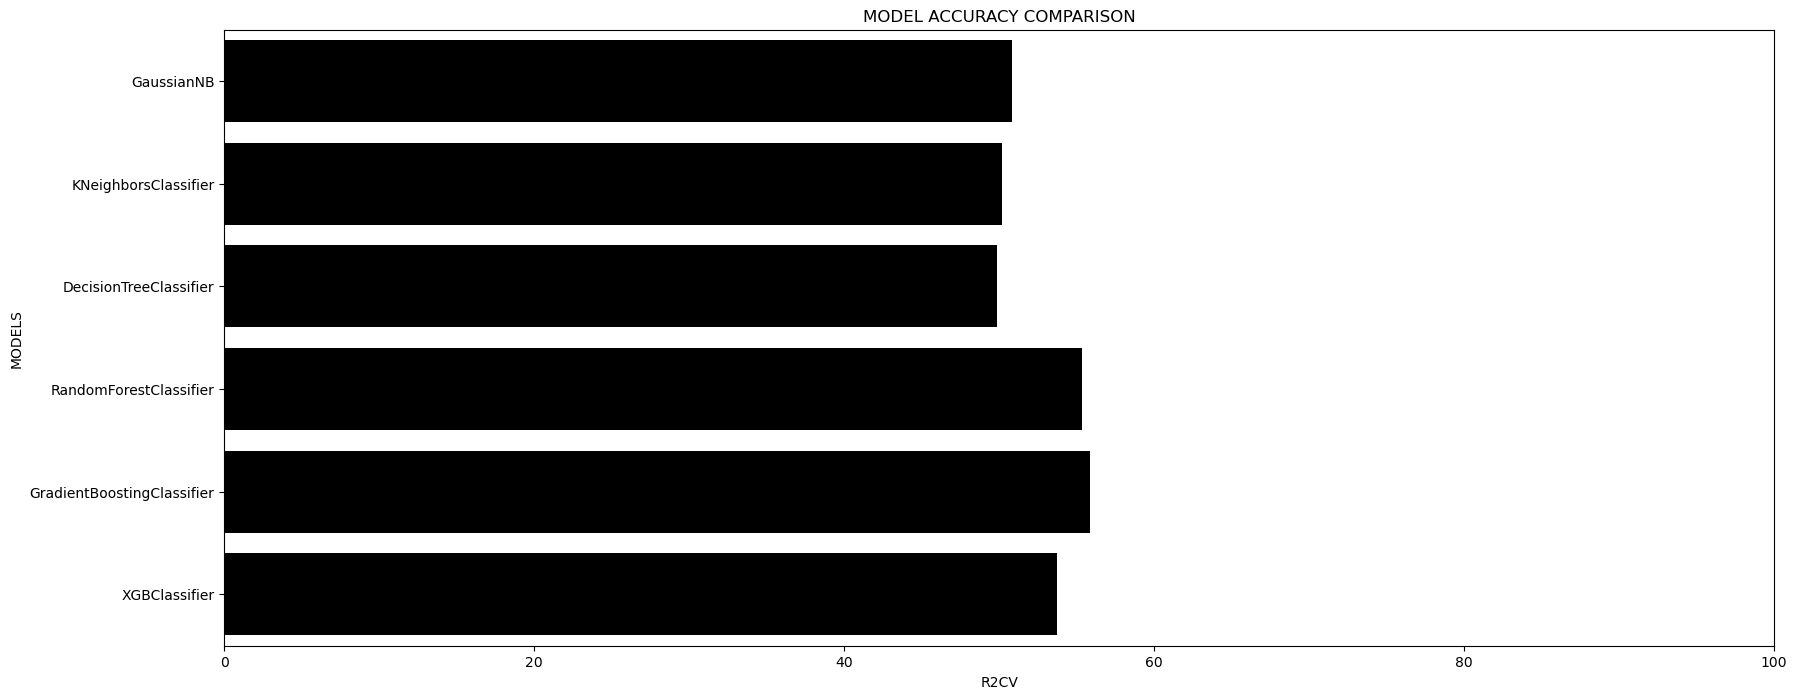

In [ ]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_m:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,result_kbest_val,y1val,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

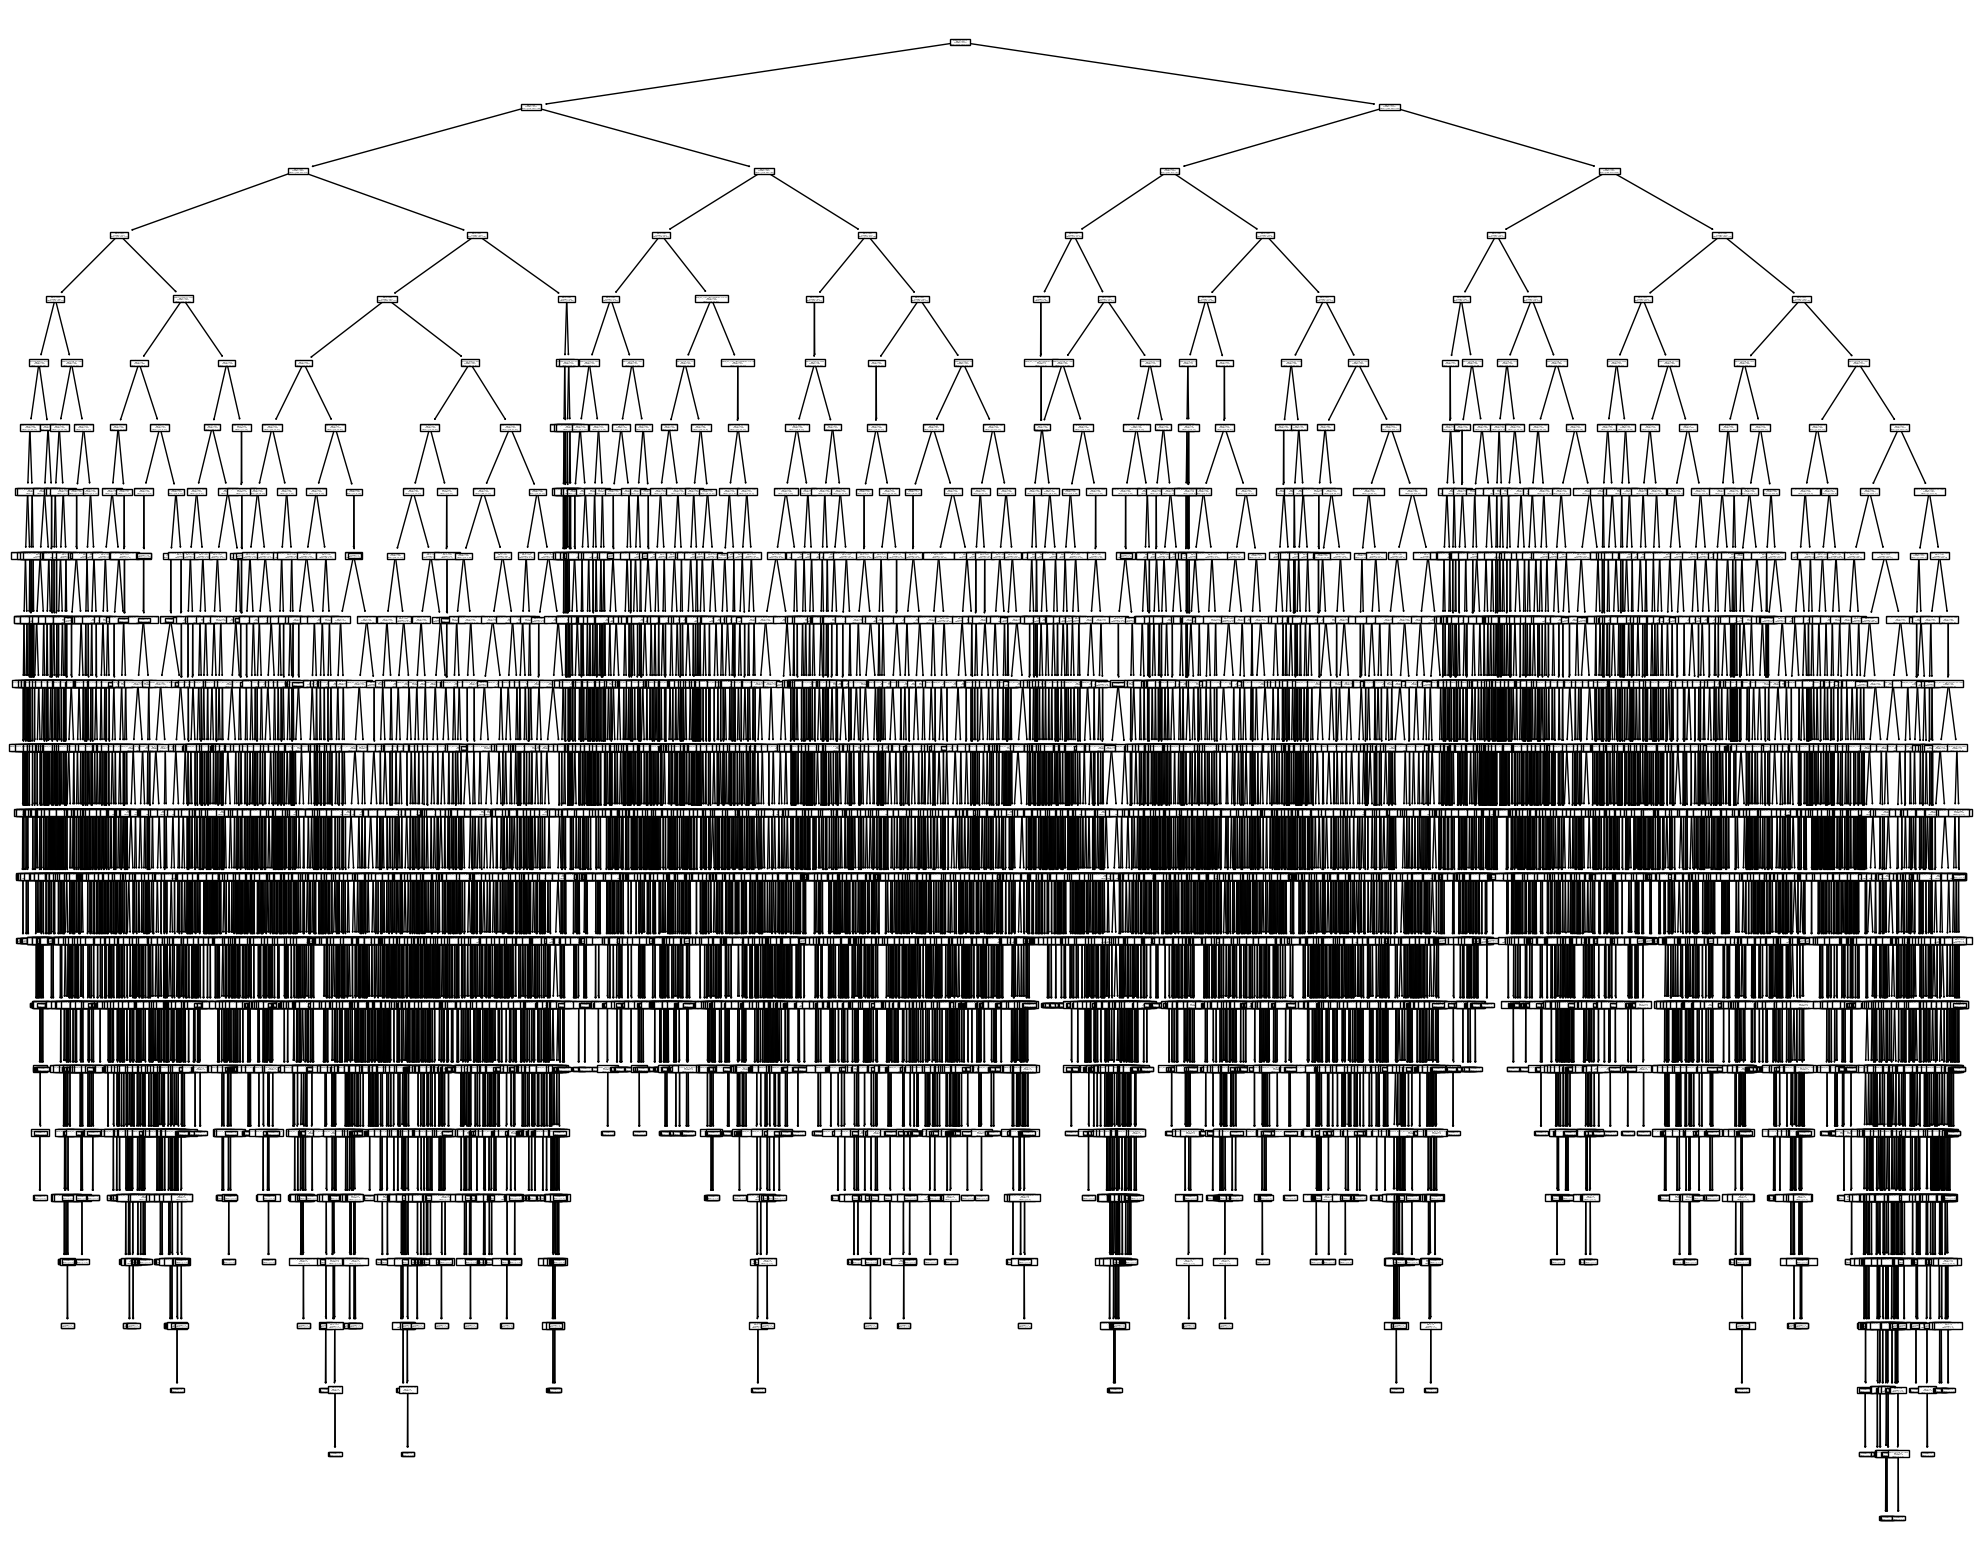

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(cartc_m, feature_names=list(result_kbest_20.columns))

In [ ]:
fig.savefig('my_plot.png')

In [ ]:
result_kbest_val2.dtypes

defective_father                       float64
paternal_gene                          float64
heart_rate                             float64
birth_place                            float64
folic_acid_periconceptional            float64
previous_pregnancy_anomalies           float64
Symptom 4                              float64
Symptom 5                              float64
Gender_Ambiguous                       float64
Gender_Female                          float64
Gender_Male                            float64
birth_asphyxia_No                      float64
birth_asphyxia_No record               float64
birth_asphyxia_Yes                     float64
birth_defect_autopsy_Yes               float64
radiation_exposure_No                  float64
radiation_exposure_Not applicable      float64
radiation_exposure_Yes                 float64
radiation_exposure_others              float64
substance_abuse_No                     float64
substance_abuse_Not applicable         float64
substance_abu

In [ ]:
for model in model_mm:
    name = model.__class__.__name__
    predict = model.predict(result_kbest_val)
    R2CV = cross_val_score(model,result_kbest_val,y2val,cv=10,verbose=False).mean()
    error = -cross_val_score(model,result_kbest_val,y2val,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(y2val,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

GaussianNB: 
----------
ACC--> 0.10693473193473194
R2CV--> 0.2357219133500576
MEAN SQUARED ERROR--> 2.624103054725516
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.13374125874125875
R2CV--> 0.18357261509254863
MEAN SQUARED ERROR--> 3.180258107440497
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.17715617715617715
R2CV--> 0.17337700861075325
MEAN SQUARED ERROR--> 3.0791092803387947
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.20512820512820512
R2CV--> 0.2109600650891586
MEAN SQUARED ERROR--> 2.8193805535151437
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.25495337995337997
R2CV--> 0.23193267340158652
MEAN SQUARED ERROR--> 2.7019533179388637
------------------------------
XGBClassifier: 
----------
ACC--> 0.2202797202797203
R2CV--> 0.1893958912468642
MEAN SQUARED ERROR--> 2.975125707333884
------------------------------


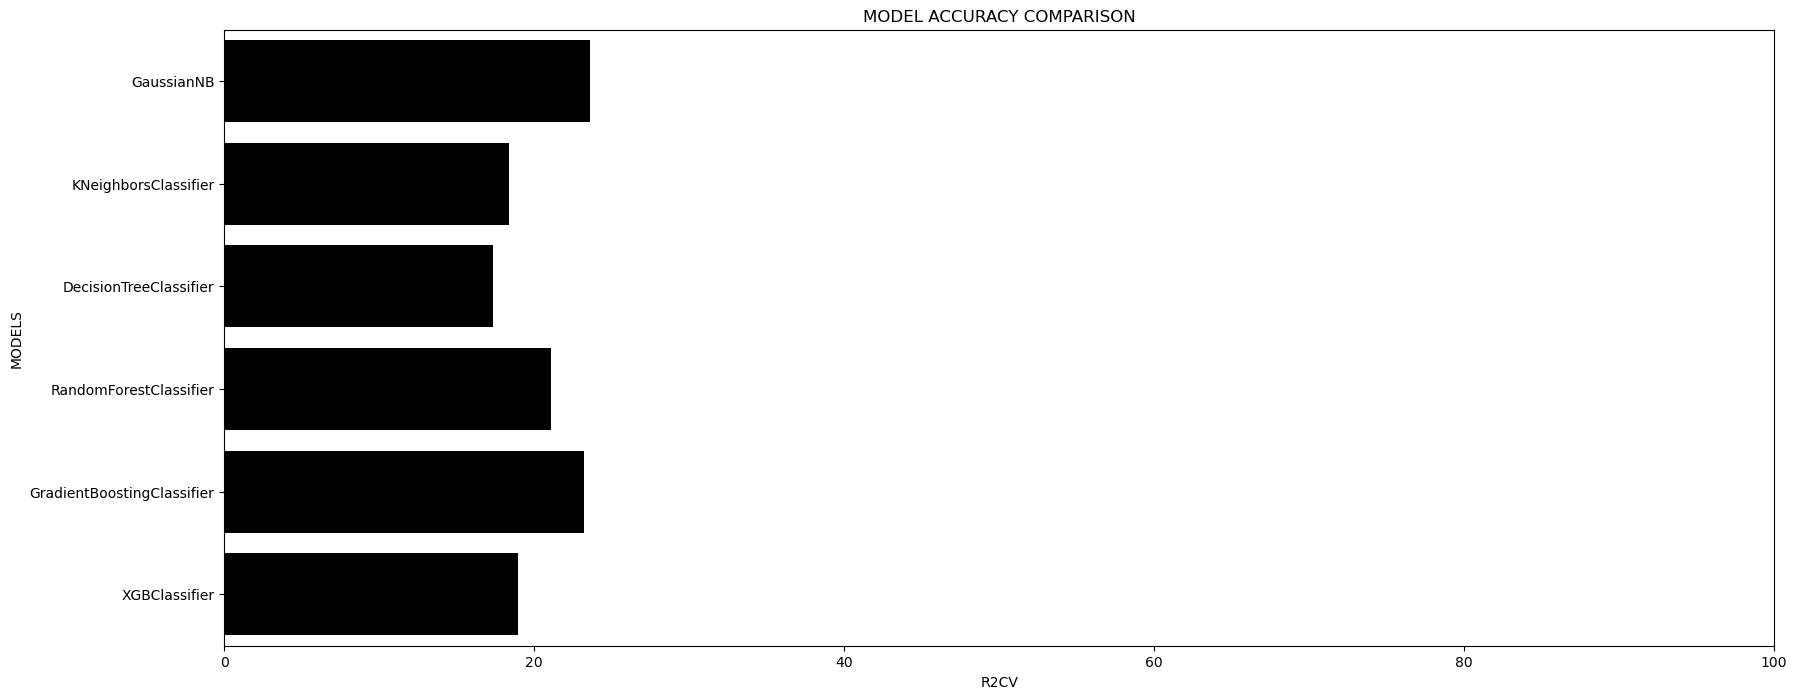

In [ ]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in model_mm:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,result_kbest_val,y2val,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

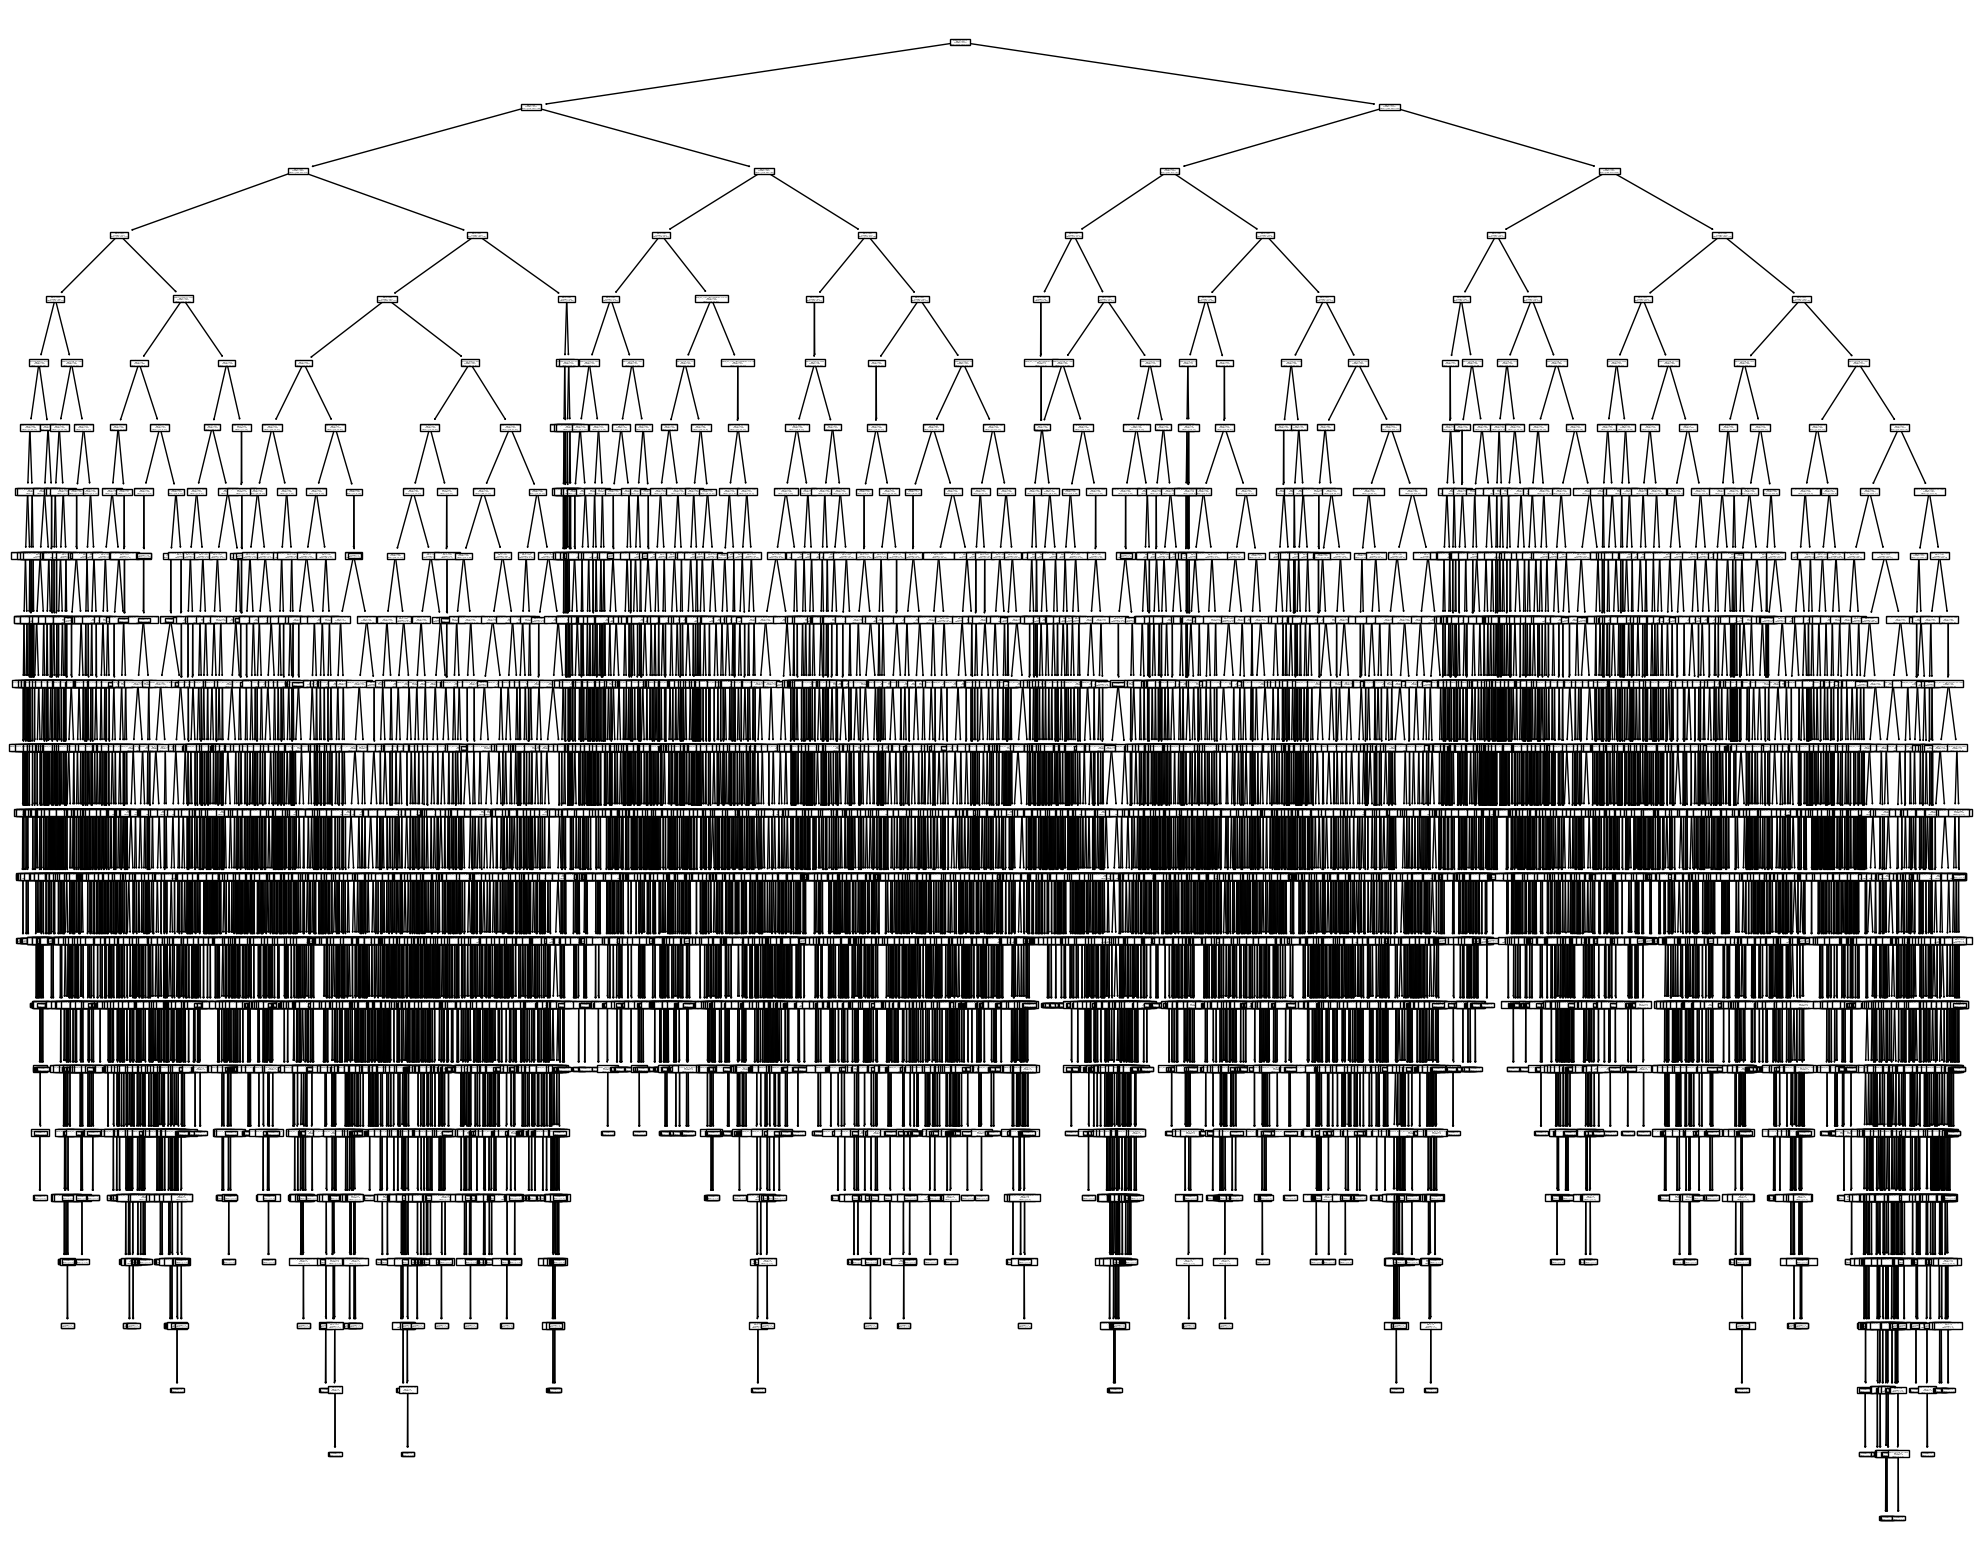

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(cartc_m, feature_names=list(result_kbest_202.columns))

In [ ]:
fig.savefig('my_plot.png')

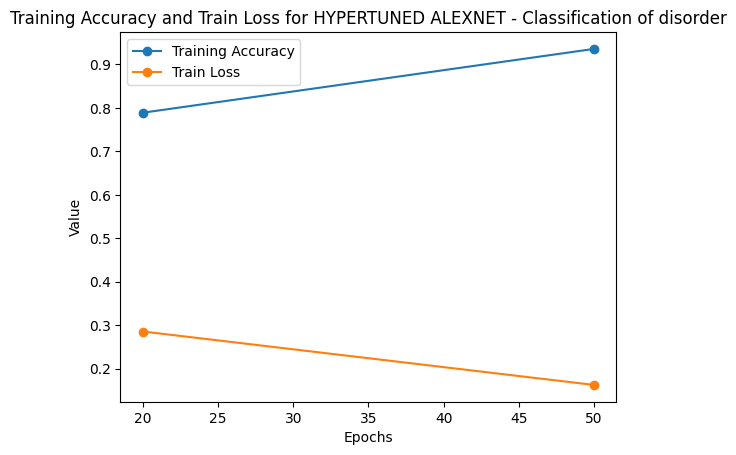

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = [20, 50]
training_accuracy = [0.7890, 0.9357]
train_loss = [0.2856, 0.1627]

# Create the plot
plt.plot(epochs, training_accuracy, marker='o', label='Training Accuracy')
plt.plot(epochs, train_loss, marker='o', label='Train Loss')

# Set plot title and labels
plt.title('Training Accuracy and Train Loss for HYPERTUNED ALEXNET - Classification of disorder')
plt.xlabel('Epochs')
plt.ylabel('Value')

# Add legend
plt.legend()

# Display the plot
plt.show()

